In [3]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [4]:
import numpy as np # linear algebra
import pandas as pd 

data = pd.read_csv("drive/My Drive/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [6]:
data = data.drop(['Usage'], axis=1)
data.shape

(35887, 2)

In [7]:
from sklearn.model_selection import train_test_split

train = data['pixels']
test = data['emotion']

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.1, random_state=10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32298,) (3589,) (32298,) (3589,)


In [8]:
width, height = 48, 48

In [9]:
X_train1 = []
for i in X_train:
    X_train1.append([int(p) for p in i.split()])
X_train1 = np.array(X_train1)/255.
X_train1.shape

(32298, 2304)

In [10]:
X_test1 = []
for i in X_test:
    X_test1.append([int(p) for p in i.split()])
X_test1 = np.array(X_test1)/255.
X_test1.shape

(3589, 2304)

In [11]:
X_test1[:2]

array([[0.72941176, 0.32156863, 0.37647059, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.34509804, 0.32941176, 0.36470588, ..., 0.64705882, 0.59607843,
        0.56078431]])

In [12]:
X_train1[:4]

array([[0.23137255, 0.25098039, 0.28627451, ..., 0.24313725, 0.23529412,
        0.23529412],
       [0.        , 0.        , 0.00784314, ..., 0.23137255, 0.2       ,
        0.15294118],
       [0.03137255, 0.11372549, 0.14901961, ..., 0.7372549 , 0.7372549 ,
        0.74117647],
       [0.21176471, 0.40392157, 0.4627451 , ..., 0.90980392, 0.9372549 ,
        0.8745098 ]])

In [13]:
X_train1 = X_train1.reshape(X_train1.shape[0], 48, 48, 1)

In [14]:
X_train1.shape

(32298, 48, 48, 1)

In [15]:
X_test1 = X_test1.reshape(X_test1.shape[0], 48, 48, 1)
X_test1.shape

(3589, 48, 48, 1)

In [16]:
X_train1.dtype, X_test1.dtype


(dtype('float64'), dtype('float64'))

In [17]:
X_train32 = X_train1.astype('float32')
X_test32 = X_test1.astype('float32')
X_train32.dtype, X_test32.dtype

(dtype('float32'), dtype('float32'))

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Activation, Dropout, MaxPooling2D, BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization

In [19]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), input_shape = (48, 48, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same'))
model.add(Conv2D(128, kernel_size=(5,5), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
activation (Activation)      (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       4

In [21]:
from tensorflow.keras.utils import to_categorical
n_epochs = 20
batch_size = 64
lr = 0.0001

In [22]:
history = model.fit(X_train32, to_categorical(y_train), 
                    batch_size = batch_size, epochs = n_epochs, validation_data= (X_test32, to_categorical(y_test)))

Epoch 1/20
505/505 [==============================] - 11s 22ms/step - loss: 1.6238 - accuracy: 0.3733 - val_loss: 1.3892 - val_accuracy: 0.4659
Epoch 2/20
505/505 [==============================] - 11s 21ms/step - loss: 1.2774 - accuracy: 0.5097 - val_loss: 1.3149 - val_accuracy: 0.4990
Epoch 3/20
505/505 [==============================] - 11s 21ms/step - loss: 1.1480 - accuracy: 0.5670 - val_loss: 1.4703 - val_accuracy: 0.4447
Epoch 4/20
505/505 [==============================] - 11s 21ms/step - loss: 1.0720 - accuracy: 0.5963 - val_loss: 1.6938 - val_accuracy: 0.4216
Epoch 5/20
505/505 [==============================] - 11s 21ms/step - loss: 0.9969 - accuracy: 0.6250 - val_loss: 1.3095 - val_accuracy: 0.5060
Epoch 6/20
505/505 [==============================] - 10s 21ms/step - loss: 0.9285 - accuracy: 0.6543 - val_loss: 1.3619 - val_accuracy: 0.5096
Epoch 7/20
505/505 [==============================] - 11s 21ms/step - loss: 0.8526 - accuracy: 0.6834 - val_loss: 1.1886 - val_accuracy:

In [23]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
15,0.222999,0.924175,1.692405,0.609919
16,0.191433,0.935166,1.772437,0.592087
17,0.179426,0.938820,1.762318,0.599889
18,0.159151,0.947861,1.880795,0.595152
19,0.153520,0.948604,1.977641,0.606576


In [30]:
y_pred = model.predict_classes(X_test32)

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(to_categorical(y_test), axis=1), y_pred)
cm

array([[258,   4,  44,  47,  45,  23, 101],
       [  7,  27,   0,   4,   7,   3,   4],
       [ 73,   3, 224,  46,  51,  40,  88],
       [ 24,   0,  17, 732,  16,  15,  63],
       [ 85,   3,  81,  61, 237,   8, 138],
       [ 12,   0,  36,  27,   5, 293,  26],
       [ 39,   2,  25,  75,  49,  15, 406]])

In [32]:
model.save('CNN_model.h5')

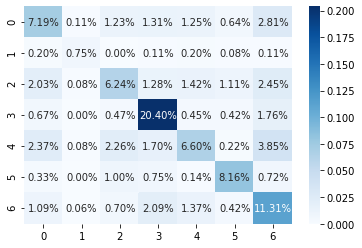

In [37]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')